In [25]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
print(len(train_data))
print(len(test_data))

8982
2246


In [26]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [27]:
word_index = reuters.get_word_index()
index_word = dict([(value, key) for (key, value) in word_index.items()])

In [28]:
texts = " ".join([index_word.get(index - 3, "?") for index in train_data[10][1:]])
texts

'period ended december 31 shr profit 11 cts vs loss 24 cts net profit 224 271 vs loss 511 349 revs 7 258 688 vs 7 200 349 reuter 3'

In [29]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

In [33]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [37]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [40]:
from tensorflow.keras.utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
with tf.device("/cpu:0"):
    model = Sequential()
    model.add(Dense(64, activation="relu", input_shape=(10000, )))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(46, activation="softmax"))
    model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [50]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 5s 90ms/step - loss: 3.0955 - accuracy: 0.4196 - val_loss: 1.7142 - val_accuracy: 0.6410
Epoch 2/20
16/16 [==============================] - 1s 39ms/step - loss: 1.5067 - accuracy: 0.6886 - val_loss: 1.3466 - val_accuracy: 0.6960
Epoch 3/20
16/16 [==============================] - 1s 38ms/step - loss: 1.1268 - accuracy: 0.7454 - val_loss: 1.1847 - val_accuracy: 0.7360
Epoch 4/20
16/16 [==============================] - 1s 40ms/step - loss: 0.8912 - accuracy: 0.8022 - val_loss: 1.0712 - val_accuracy: 0.7660
Epoch 5/20
16/16 [==============================] - 1s 38ms/step - loss: 0.6964 - accuracy: 0.8470 - val_loss: 0.9977 - val_accuracy: 0.7880
Epoch 6/20
16/16 [==============================] - 1s 39ms/step - loss: 0.5568 - accuracy: 0.8809 - val_loss: 0.9538 - val_accuracy: 0.7990
Epoch 7/20
16/16 [==============================] - 1s 38ms/step - loss: 0.4448 - accuracy: 0.9078 - val_loss: 0.9260 - val_accuracy: 0.8080
Epoch 8/20
16

In [54]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [56]:
len(history.history["loss"])

20

In [61]:
x = np.arange(len(history.history["loss"]))

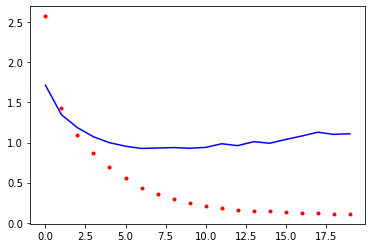

In [65]:
import matplotlib.pyplot as plt

plt.plot(x, history.history["loss"], "r.")
plt.plot(x, history.history["val_loss"], "b")
plt.show()

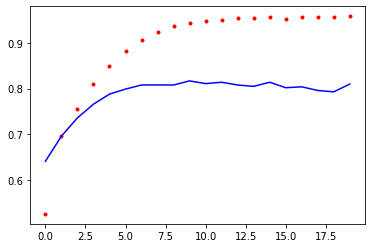

In [64]:
plt.plot(x, history.history["accuracy"], "r.")
plt.plot(x, history.history["val_accuracy"], "b")
plt.show()

In [66]:
with tf.device("/cpu:0"):
    model = Sequential()
    model.add(Dense(64, activation="relu", input_shape=(10000, )))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(46, activation="softmax"))
    model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
    
    model.fit(partial_x_train, partial_y_train, epochs=8, batch_size=512, validation_data=(x_val, y_val))
    results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/8
16/16 [==============================] - 2s 62ms/step - loss: 3.0855 - accuracy: 0.4139 - val_loss: 1.7225 - val_accuracy: 0.6470
Epoch 2/8
16/16 [==============================] - 1s 42ms/step - loss: 1.5023 - accuracy: 0.6981 - val_loss: 1.3064 - val_accuracy: 0.7080
Epoch 3/8
16/16 [==============================] - 1s 41ms/step - loss: 1.0490 - accuracy: 0.7751 - val_loss: 1.1253 - val_accuracy: 0.7590
Epoch 4/8
16/16 [==============================] - 1s 43ms/step - loss: 0.8360 - accuracy: 0.8217 - val_loss: 1.0414 - val_accuracy: 0.7570
Epoch 5/8
16/16 [==============================] - 1s 42ms/step - loss: 0.6622 - accuracy: 0.8545 - val_loss: 0.9563 - val_accuracy: 0.7970
Epoch 6/8
16/16 [==============================] - 1s 41ms/step - loss: 0.5199 - accuracy: 0.8935 - val_loss: 0.9088 - val_accuracy: 0.8090
Epoch 7/8
16/16 [==============================] - 1s 49ms/step - loss: 0.4138 - accuracy: 0.9159 - val_loss: 0.9071 - val_accuracy: 0.8130
Epoch 8/8
71/71 [===

In [67]:
results

[0.9699015617370605, 0.7871772050857544]

In [68]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.18210151380231523

In [124]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf
with tf.device("/cpu:0"):
    model = Sequential()
    model.add(Dense(128, activation="relu", input_shape=(10000, )))
    model.add(Dense(128, activation="relu"))
    model.add(Dense(46, activation="softmax"))
    model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
    history = model.fit(partial_x_train, partial_y_train, epochs=8, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/8
16/16 [==============================] - 2s 84ms/step - loss: 2.7575 - accuracy: 0.4176 - val_loss: 1.3729 - val_accuracy: 0.6900
Epoch 2/8
16/16 [==============================] - 1s 59ms/step - loss: 1.1979 - accuracy: 0.7438 - val_loss: 1.1345 - val_accuracy: 0.7490
Epoch 3/8
16/16 [==============================] - 1s 64ms/step - loss: 0.8172 - accuracy: 0.8247 - val_loss: 1.0353 - val_accuracy: 0.7720
Epoch 4/8
16/16 [==============================] - 1s 62ms/step - loss: 0.5992 - accuracy: 0.8755 - val_loss: 0.9042 - val_accuracy: 0.8090
Epoch 5/8
16/16 [==============================] - 1s 60ms/step - loss: 0.4402 - accuracy: 0.9085 - val_loss: 0.8752 - val_accuracy: 0.8230
Epoch 6/8
16/16 [==============================] - 1s 63ms/step - loss: 0.3319 - accuracy: 0.9311 - val_loss: 0.8697 - val_accuracy: 0.8160
Epoch 7/8
16/16 [==============================] - 1s 61ms/step - loss: 0.2588 - accuracy: 0.9400 - val_loss: 0.8742 - val_accuracy: 0.8210
Epoch 8/8
16/16 [===

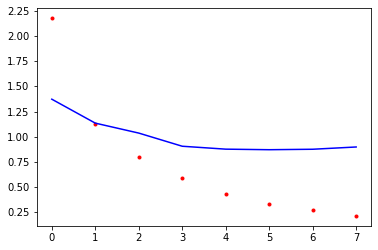

In [125]:
import matplotlib.pyplot as plt

plt.plot(x[:8], history.history["loss"], "r.")
plt.plot(x[:8], history.history["val_loss"], "b")
plt.show()

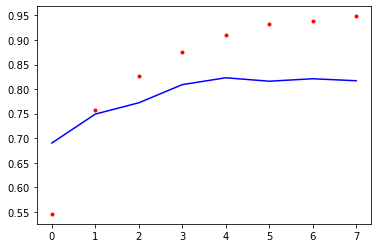

In [126]:
plt.plot(x[:8], history.history["accuracy"], "r.")
plt.plot(x[:8], history.history["val_accuracy"], "b")
plt.show()

In [95]:
with tf.device("/cpu:0"):
    predictions = model.predict(x_test)

In [98]:
np.argmax(predictions[0])

3

In [102]:
train_labels == np.array(train_labels)

array([ True,  True,  True, ...,  True,  True,  True])

In [114]:
import tensorflow as tf
with tf.device("/cpu:0"):
    model = Sequential()
    model.add(Dense(64, activation="relu", input_shape=(10000, )))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(46, activation="softmax"))
    model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    history = model.fit(x_train, np.array(train_labels), epochs=8, batch_size=512)

Epoch 1/8
18/18 [==============================] - 1s 35ms/step - loss: 3.1832 - accuracy: 0.4162
Epoch 2/8
18/18 [==============================] - 1s 36ms/step - loss: 1.5008 - accuracy: 0.6930
Epoch 3/8
18/18 [==============================] - 1s 36ms/step - loss: 1.0881 - accuracy: 0.7716
Epoch 4/8
18/18 [==============================] - 1s 36ms/step - loss: 0.8290 - accuracy: 0.8267
Epoch 5/8
18/18 [==============================] - 1s 36ms/step - loss: 0.6847 - accuracy: 0.8631
Epoch 6/8
18/18 [==============================] - 1s 36ms/step - loss: 0.5153 - accuracy: 0.8940
Epoch 7/8
18/18 [==============================] - 1s 36ms/step - loss: 0.4124 - accuracy: 0.9142
Epoch 8/8
18/18 [==============================] - 1s 34ms/step - loss: 0.3438 - accuracy: 0.9334
